<a href="https://colab.research.google.com/github/KalaiselviNarendar/Machine-Learning/blob/main/PCA_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn.datasets import load_iris
iris_bunch=load_iris()

In [6]:
import pandas as pd
x=iris_bunch.data
y=iris_bunch.target

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=21)

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.fit_transform(x_test)

In [9]:
from sklearn.decomposition import PCA
pca_model=PCA()
x_train_pca=pca_model.fit_transform(x_train_scaled)
x_test_pca=pca_model.fit_transform(x_test_scaled)

In [10]:
pca_model.explained_variance_ratio_

array([0.69489568, 0.25830074, 0.04239017, 0.0044134 ])

In [11]:
# 1st PC has high variance 69.4%, 
# we can go ahead with PC1 but model prediction will be less 
# so we can add both pc1 and pc2 to predict model


In [12]:
print(x_train_pca.shape)
print(x_test_pca.shape)

(112, 4)
(38, 4)


In [13]:
pca2_model=PCA(n_components=2)
x_train_pca2=pca2_model.fit_transform(x_train_scaled)
x_test_pca2=pca2_model.fit_transform(x_test_scaled)

In [14]:
print(x_train_pca2.shape)
print(x_test_pca2.shape)

(112, 2)
(38, 2)


In [15]:
pca2_model.explained_variance_ratio_

array([0.69489568, 0.25830074])

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train_pca2,y_train)

KNeighborsClassifier(n_neighbors=4)

In [18]:
y_test_pred=knn.predict(x_test_pca2)

In [19]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_test_pred))

0.8421052631578947


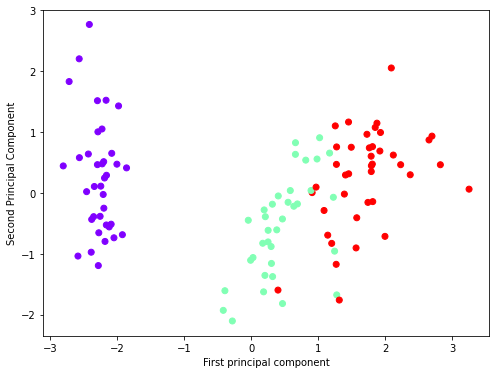

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x_train_pca2[:,0],x_train_pca2[:,1],c=y_train,cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

In [22]:
#Applying LDA on the dataset (scaled data)

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
lda_model=LDA()
x_train_lda=lda_model.fit_transform(x_train_scaled,y_train)
#x_test_lda=lda_model.fit_transform(x_test_scaled) we get error so we use transform
x_test_lda=lda_model.transform(x_test_scaled)

In [28]:
lda_model.explained_variance_ratio_

array([0.99337735, 0.00662265])

In [27]:
print(x_train_lda.shape)

(112, 2)


In [29]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train_lda,y_train)

KNeighborsClassifier(n_neighbors=4)

In [30]:
y_test_pred_lda=knn.predict(x_test_lda)
print(accuracy_score(y_test,y_test_pred_lda))

0.9210526315789473


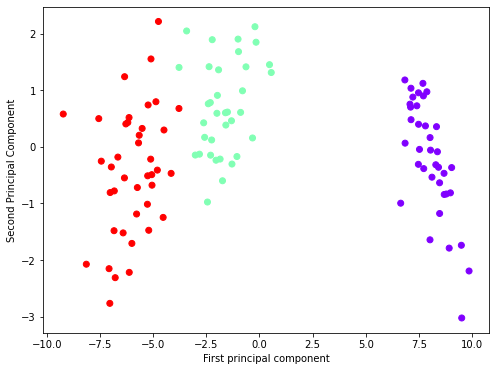

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x_train_lda[:,0],x_train_lda[:,1],c=y_train,cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()